# Wine Classification using Support Vector Machines (SVM)
This notebook demonstrates a machine learning pipeline to classify wines using the Wine dataset from Scikit-Learn. We use Support Vector Machines (SVM) with a one-versus-all approach to handle multiclass classification.

Train an SVM classifier on the Wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

## Step 1: Load the Dataset

## Class Distribution
This bar plot shows how the target classes (wine cultivators) are distributed in the dataset.

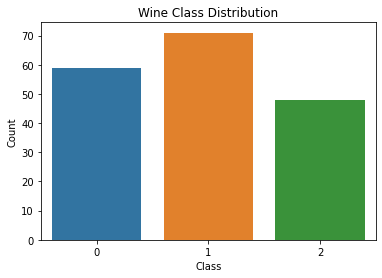

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_wine

# Load dataset
wine = load_wine()
y = wine.target

# Plot class distribution
sns.countplot(x=y)
plt.title('Wine Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [2]:
import sys
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets


In [3]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)


## Step 2: Data Exploration

In [4]:
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Step 3: Data Preprocessing

In [6]:
type(wine)           # sklearn.utils._bunch.Bunch
type(wine.data)      # pandas.core.frame.DataFrame
type(wine.target)    # pandas.core.series.Series
type(wine.frame)     # pandas.core.frame.DataFrame


pandas.core.frame.DataFrame

In [7]:
wine.frame['target'].unique()


array([0, 1, 2])

In [8]:
wine.frame['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

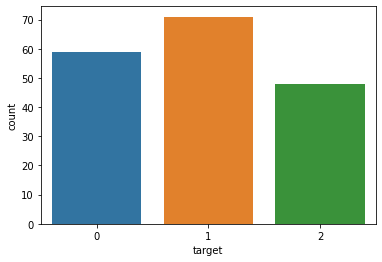

In [9]:
#Checking if the target balanced or unbalanced?
sns.countplot(x='target',data=wine.frame)

## Step 4: Train the SVM Model

In [10]:
#Calculating the correlation between the various features and the "target" column.
wine.frame.corr()['target'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
target                          1.000000
Name: target, dtype: float64

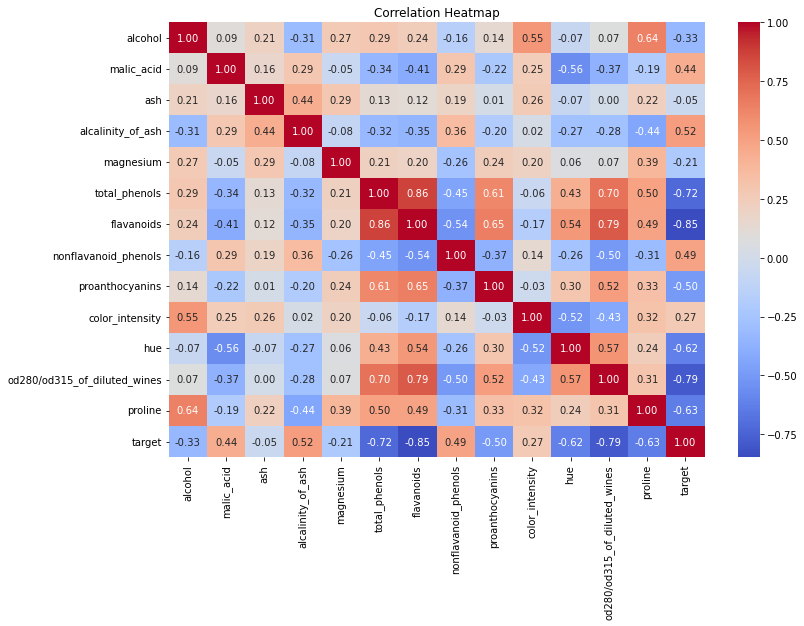

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(wine.frame.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


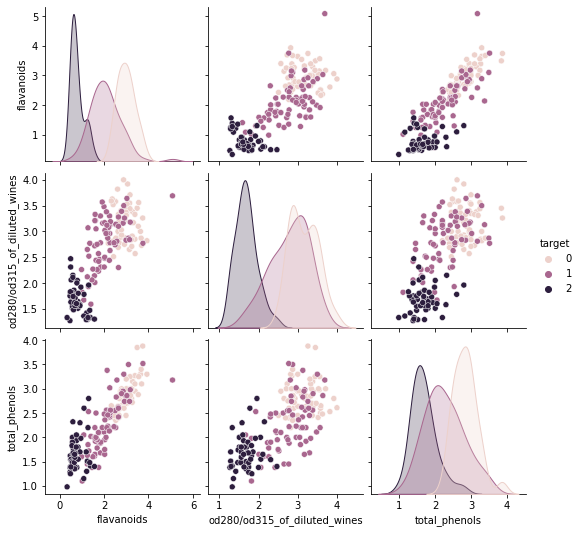

In [12]:
# Pairplot for selected features and target:
sns.pairplot(
    wine.frame[['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'target']],
    hue='target'
)



#### Machine Learning Model

In [13]:
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
# Training an SVM with Cross-Validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC(kernel="linear", random_state=42)

scores = cross_val_score(svm_clf, scaled_X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.96551724 0.93103448 0.96428571 0.92857143 0.92857143]
Mean CV accuracy: 0.9435960591133006


In [16]:
svm_clf.fit(scaled_X_train, y_train)
y_pred = svm_clf.predict(scaled_X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



## Step 5: Model Evaluation

In [17]:
#Trying a Nonlinear Kernel (RBF)
svm_rbf = SVC(kernel="rbf", gamma="scale", C=1, random_state=42)
svm_rbf.fit(scaled_X_train, y_train)
y_pred_rbf = svm_rbf.predict(scaled_X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 'scale']
}

svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1)



In [19]:
grid_search.fit(scaled_X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 'scale']},
             verbose=1)

In [20]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.01}
Best CV Score: 0.9788177339901478


In [21]:
y_pred = grid_search.predict(scaled_X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Confusion Matrix
This plot shows how well the SVM classifier performed on each class.

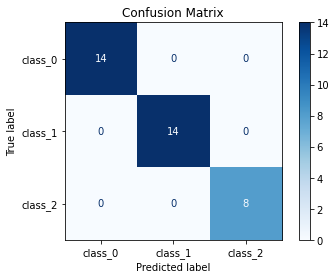

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Conclusion
The Support Vector Machine (SVM) classifier was trained using a one-versus-all strategy. The model's performance indicates that SVMs are effective for this classification problem, given proper preprocessing and parameter tuning. Further improvements might include trying different kernels or performing hyperparameter optimization.